In [1]:
import numpy as np
import matplotlib.pyplot as plt


Absolutely, here's a concise summary:

The Fast Fourier Transform (FFT) output has the same shape as the input signal.

Each element of the FFT output is a complex number, composed of a real part and an imaginary part.

The real part of each complex number represents the amplitude (magnitude) of a cosine wave at a certain frequency.

The imaginary part of each complex number represents the amplitude (magnitude) of a sine wave at the same frequency.

The FFT output for real-valued signals is symmetric. Specifically, it's conjugate symmetric, which means the second half of the array (negative frequencies) is the mirror image of the first half (positive frequencies), but with the imaginary parts negated. This means the real part is symmetric around the center and the imaginary part is anti-symmetric around the center.

The k-th element in the FFT output array represents the strength (magnitude) of the cosine and sine waves at the frequency corresponding to the k-th frequency bin. The exact frequency this corresponds to in Hz depends on the length of your signal and your sampling rate. If the length of your signal corresponds to T seconds, then each frequency bin k corresponds to k/T Hz. Therefore, the 4th element corresponds to a frequency of 4/T Hz. The real and imaginary parts give the magnitudes of the cosine and sine components at this frequency, respectively.

In [139]:
def plot(sample_per_second, time_range = [-1, 1]):
    
    '''
    sample_per_second : so-called sampling rate means how many points sampled in unit time (normally one second)
    and it's same with hz
    time_range : sampling time range : if [A, B] means array sampled A second to B second
    Thus, total array length is (A-B)*sample_per_second
    '''
    
    '''
    duration : total time for sample
    sample_num : total sample numbers
    signal_time : x range and len(signal_time) == sampel_num
    
    frequency : since maximun hz for the signal is sample_per_second 
    and note that frequency used for capture index of the fft_result
    so, if 10th of fft_result is high then the corresonding hz(frequency) is 10th of the frequency
    '''
    duration = time_range[1] - time_range[0]
    sample_num =  sample_per_second * duration
    signal_time = np.linspace(*time_range, sample_num)
    # frequency = np.arange(sample_num)/ duration
    frequency = np.linspace(0, sample_per_second, sample_num)
    
    
    signal = 4*np.sin(2*np.pi*1*signal_time)
    signal += 8*np.cos(2*np.pi*5*signal_time) 
    signal += -2*np.sin(2*np.pi*9*signal_time) 
    signal += -6*np.cos(2*np.pi*14*signal_time)

    # see
    fft_result = np.fft.fft(signal)
    fft_result = fft_result

    plt.figure(figsize = (12, 3))

    plt.subplot(141)
    plt.plot(frequency, np.abs(fft_result))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('FFT Amplitude |X(frequency)|')
    plt.xlim(0, 30)

    plt.subplot(142)
    plt.plot(frequency, np.real(fft_result))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('sine')
    plt.xlim(0, 30)

    plt.subplot(143)
    plt.plot(frequency, np.imag(fft_result))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('cosine')
    plt.xlim(0, 30)

    plt.subplot(144)
    plt.plot(signal_time, np.fft.ifft(fft_result), 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    _ = plt.show()


    ss = [(idx, a) for idx, a in enumerate(np.real(fft_result/ len(signal))) if abs(a) > 0.1]
    cc = [(idx, a) for idx, a in enumerate(np.imag(fft_result/ len(signal))) if abs(a) > 0.1]
    print(ss)
    print(cc)                   

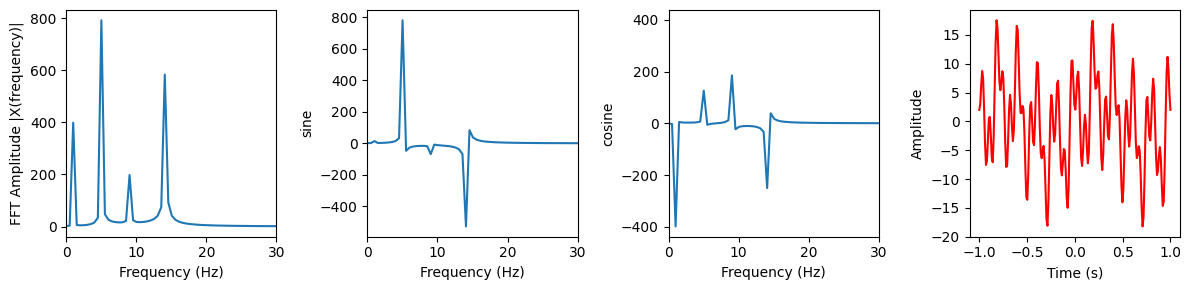

[(9, 0.1647037025334113), (10, 3.9087308967096233), (11, -0.23508817152220604), (12, -0.13040616739864078), (18, -0.34046764295705134), (24, -0.10190043033665135), (25, -0.12997184049757748), (26, -0.18452959003335792), (27, -0.335367950321383), (28, -2.635519077307732), (29, 0.41872708881015686), (30, 0.18795256268719784), (31, 0.11881227371501803), (169, 0.11881227371501804), (170, 0.18795256268719793), (171, 0.41872708881015686), (172, -2.635519077307732), (173, -0.335367950321383), (174, -0.18452959003335792), (175, -0.12997184049757748), (176, -0.10190043033665132), (182, -0.3404676429570511), (188, -0.13040616739864064), (189, -0.23508817152220604), (190, 3.9087308967096233), (191, 0.16470370253341127)]
[(2, -1.992218813326864), (10, 0.631214434289745), (18, 0.9281430491833647), (19, -0.11462294065099546), (27, -0.16312203274152204), (28, -1.2508659204186727), (29, 0.19526855372708782), (171, -0.19526855372708782), (172, 1.2508659204186727), (173, 0.16312203274152204), (181, 0.11

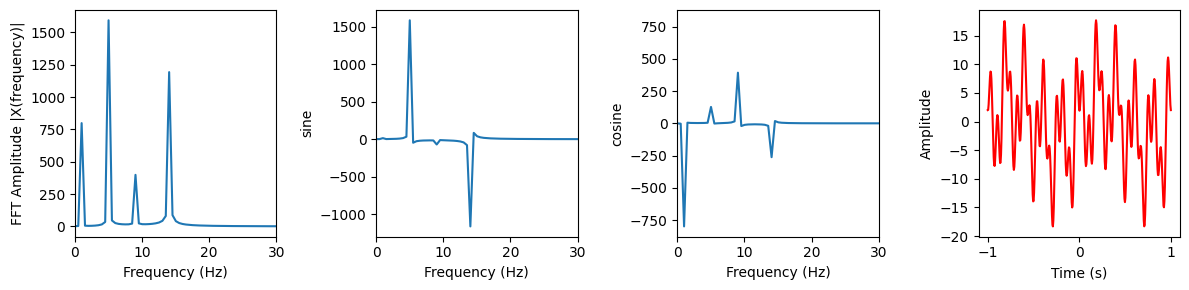

[(10, 3.9709704863964475), (11, -0.11578516023725204), (18, -0.1744238419022944), (26, -0.1048759398484107), (27, -0.19657703597903), (28, -2.9096470281849838), (29, 0.2134696585525753), (30, 0.10012577941538942), (370, 0.10012577941538943), (371, 0.21346965855257533), (372, -2.9096470281849838), (373, -0.19657703597903), (374, -0.1048759398484107), (382, -0.17442384190229449), (389, -0.11578516023725204), (390, 3.9709704863964475)]
[(2, -1.9965198843990015), (10, 0.3186080909605841), (18, 0.9817406844760533), (28, -0.6552951822741762), (372, 0.6552951822741764), (382, -0.9817406844760532), (390, -0.3186080909605842), (398, 1.9965198843990015)]


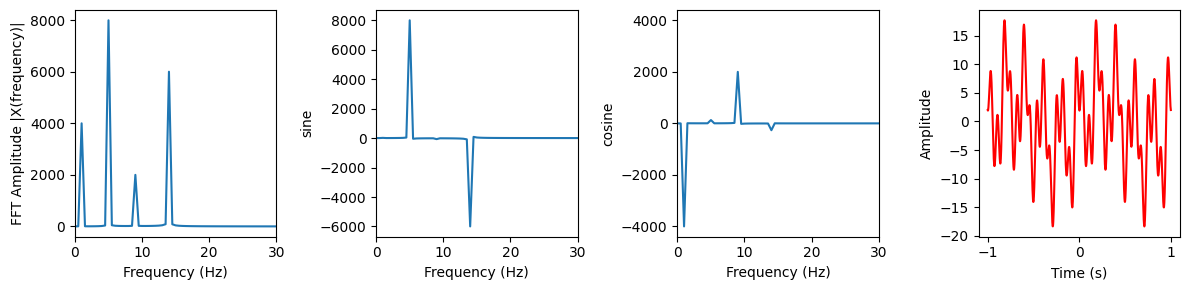

[(10, 3.9968854601658204), (28, -2.997424628207032), (1972, -2.997424628207032), (1990, 3.996885460165821)]
[(2, -1.999370683899314), (18, 0.9992470082070456), (28, -0.13287294399811478), (1972, 0.1328729439981148), (1982, -0.9992470082070456), (1998, 1.999370683899314)]


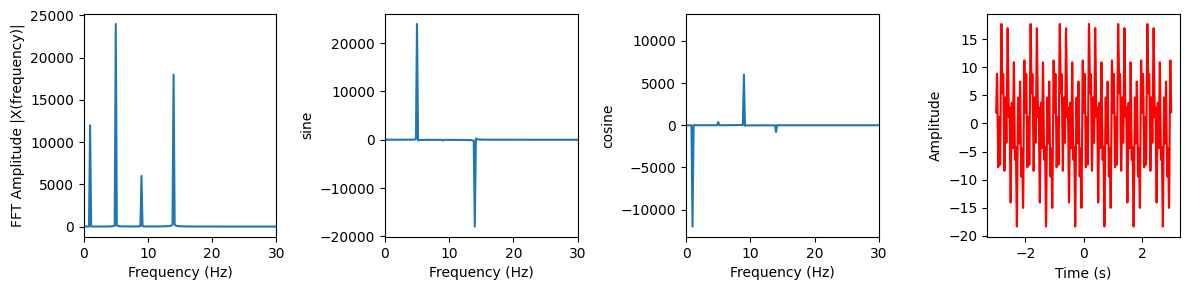

[(30, 3.9985230235495304), (84, -2.996563105457775), (5916, -2.996563105457775), (5970, 3.9985230235495304)]
[(6, -1.9997814698638987), (54, 0.9993937357192416), (84, -0.1321985837482526), (5916, 0.1321985837482527), (5946, -0.9993937357192416), (5994, 1.9997814698638987)]


In [140]:
plot(100, [-1, 1])
plot(200, [-1, 1])
plot(1000, [-1, 1])
plot(1000, [-3, 3])

the reuslt of 'plot(1000, [-3, 3])' show that   
for sine the high indices are [30, 84, 5916, 5970] and for cosine [6, 54, 5946, 5994]  
and since input signal shape for fft method is 1000*(3--3)=6_000,  
the indices are symmetric.  


Thus, we consider only [30, 84] for sine and [6, 54] for cosine  
and the numbers correspond to `frequency = np.linspace(0, sample_per_second, sample_num)`  
for this example `frequency = np.linspace(0, 1000, 6000)`  
thus corresponding frequencies are [5, 14] and [1, 9]  (since `np.linspace(0, 1000, 6000)[54]`)  
so we can find the frequencise for original signal  

Also, we have to find the magnitudes  
since [23991, -17979] and [-11998, 5996] are corresponding magnitudes  
and indeed these are magnitude*frequncy(Hz)  
for this case we can just divide by len(signal)  

Finally we can recover the original signal 


### more complex function

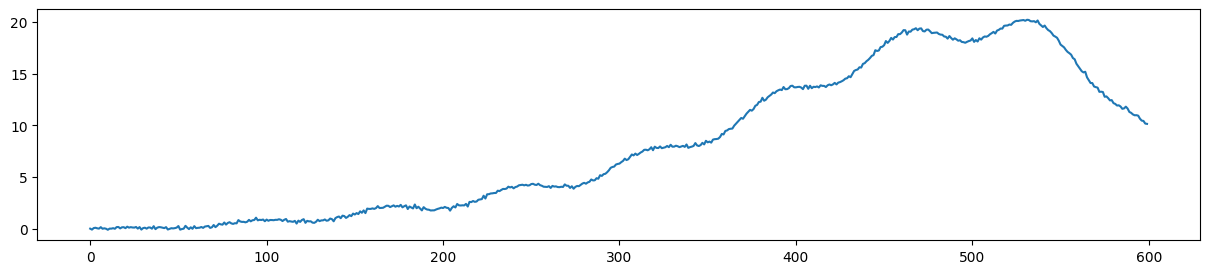

In [141]:
time_range = [0, 3]
sample_per_second = 200
duration = time_range[1] - time_range[0]
sample_num =  sample_per_second * duration
signal_time = np.linspace(*time_range, sample_num)

signal = np.sin(signal_time)*signal_time*np.exp(signal_time)+ np.sin(10*signal_time)*signal_time*np.cos(7*signal_time)+np.random.normal(scale=.1, size=len(signal_time))

plt.figure(figsize = (15,3))
_ = plt.plot(signal)

228 266


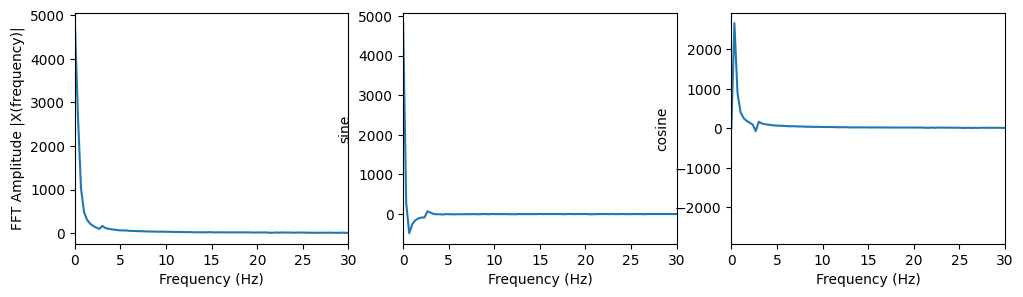

In [142]:

frequency = np.linspace(0, sample_per_second, sample_num)


fft_result = np.fft.fft(signal)

plt.figure(figsize = (12, 3))

plt.subplot(131)
plt.plot(frequency, np.abs(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude |X(frequency)|')
plt.xlim(0, 30)

plt.subplot(132)
plt.plot(frequency, np.real(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('sine')
plt.xlim(0, 30)

plt.subplot(133)
plt.plot(frequency, np.imag(fft_result))
plt.xlabel('Frequency (Hz)')
plt.ylabel('cosine')
plt.xlim(0, 30)

sines = [(idx, a) for idx, a in enumerate(np.real(fft_result[:int(len(fft_result))]/ len(signal))) if abs(a) > 0.01]
cosines = [(idx, a) for idx, a in enumerate(np.imag(fft_result[:int(len(fft_result))]/ len(signal))) if abs(a) > 0.01]
print(len(sines), len(cosines))    

In [143]:
def inver_from_fft(sines, cosines):
    value_list = list()
    for idx, val in cosines:  # Use cosines with cos
        def ss(time):
            return val*np.cos(2*np.pi*idx*time)
        value_list.append(ss(signal_time))
    for idx, val in sines:  # Use sines with sin
        def ss(time):
            return val*np.sin(2*np.pi*idx*time)
        value_list.append(ss(signal_time))
    return value_list


In [144]:
value_list = inver_from_fft(cosines, sines)

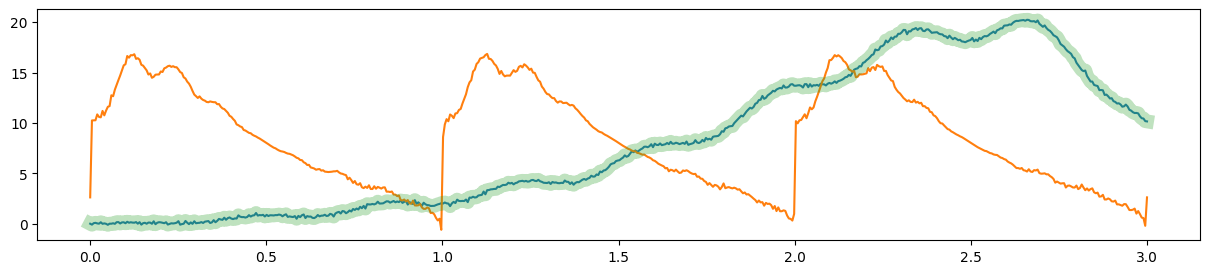

In [145]:
plt.figure(figsize = (15,3))
plt.plot(signal_time, signal)
plt.plot(signal_time, np.stack(value_list).sum(axis = 0))
plt.plot(signal_time, np.fft.ifft(fft_result), alpha = 0.3, linewidth = 10)

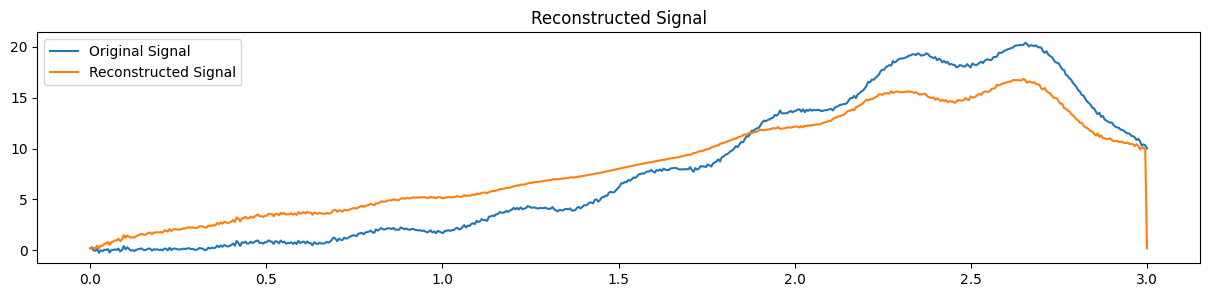

In [153]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
time_range = [0, 3]
sample_per_second = 200
duration = time_range[1] - time_range[0]
sample_num = int(sample_per_second * duration)
signal_time = np.linspace(*time_range, sample_num)

# Generate signal
signal = (
    np.sin(signal_time) * signal_time * np.exp(signal_time)
    + np.sin(10 * signal_time) * signal_time * np.cos(7 * signal_time)
    + np.random.normal(scale=0.1, size=len(signal_time))
)

# Perform FFT
fft_result = np.fft.fft(signal)

# Calculate frequencies
delta_freq = 1 / duration
frequencies = np.arange(sample_num) * delta_freq

# Reconstruct signal
reconstructed_signal = np.zeros_like(signal)
for i in range(sample_num):
    amplitude = np.abs(fft_result[i]) / sample_num
    phase = np.angle(fft_result[i])
    freq = frequencies[i]
    reconstructed_signal += amplitude * np.cos(2 * np.pi * freq * signal_time + phase)

# Plot original and reconstructed signal
plt.figure(figsize=(15, 3))
plt.plot(signal_time, signal, label="Original Signal")
plt.plot(signal_time, reconstructed_signal, label="Reconstructed Signal")
plt.title("Reconstructed Signal")
plt.legend()
plt.show()
